<a href="https://colab.research.google.com/github/Jhous92/Data_Science_Projects/blob/main/teste/Dados_Censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning
Objetivo: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano.
## Habilidades Avaliadas:
* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

#### Os dados foram retirados do UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Meus Projetos/Projeto_Minerando_Dados/adult.data', na_values='?')

In [4]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.groupby('occupation').size()

occupation
Adm-clerical         5611
Armed-Forces           15
Craft-repair         6112
Exec-managerial      6086
Farming-fishing      1490
Handlers-cleaners    2072
Machine-op-inspct    3022
Other-service        4923
Priv-house-serv       242
Prof-specialty       6172
Protective-serv       983
Sales                5504
Tech-support         1446
Transport-moving     2355
dtype: int64

### Culinas do Dataset

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

**income**: Renda

In [6]:
# Verificando as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [7]:
# Verificando se há nulos
df.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
# Verificando algumas descrições
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Análise exploratória através de gráficos

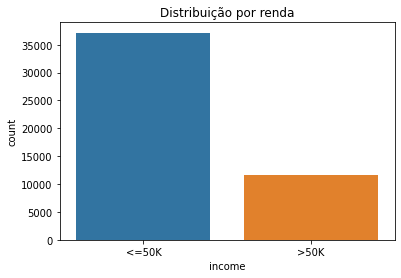

In [9]:
plt.title('Distribuição por renda')
sns.countplot(x='income', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

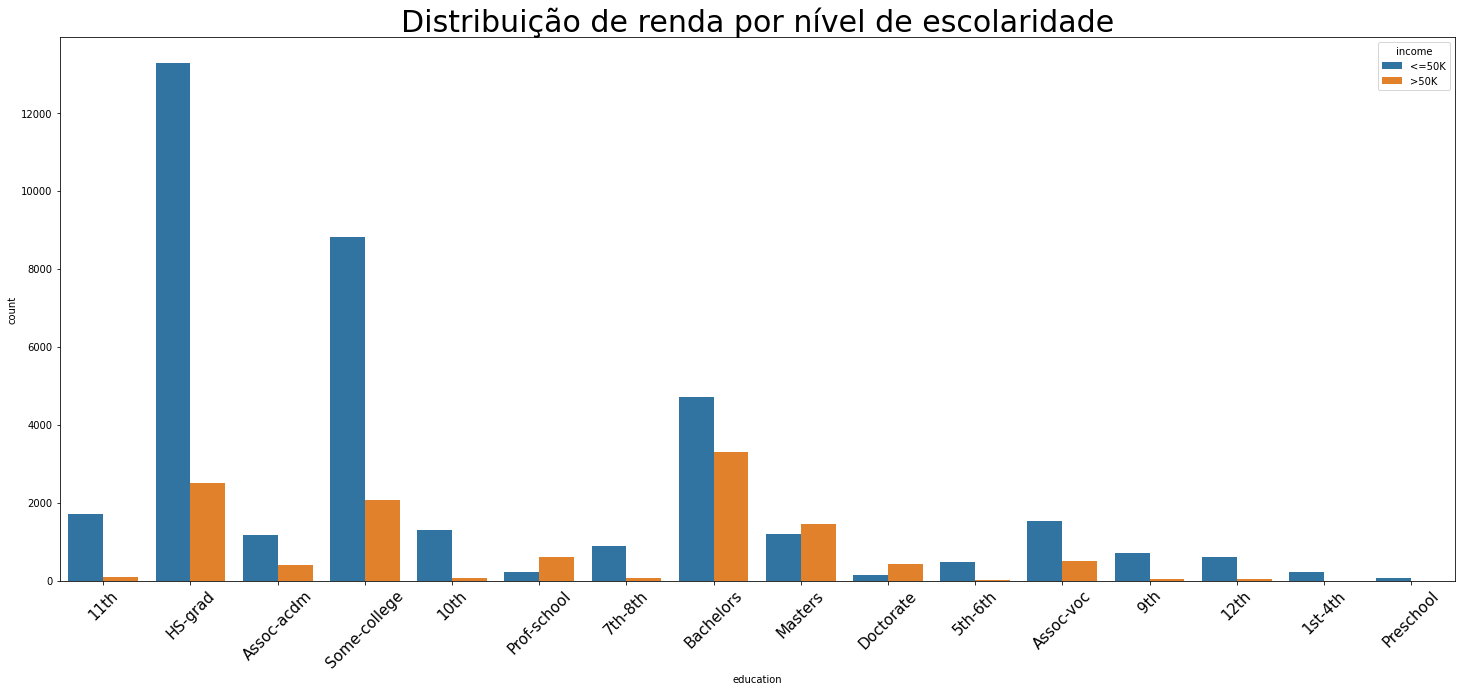

In [10]:
plt.figure(figsize=(25, 10))
plt.title('Distribuição de renda por nível de escolaridade', fontdict={'fontsize':30})
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=45, fontsize=15)

Text(0, 0.5, 'quantity')

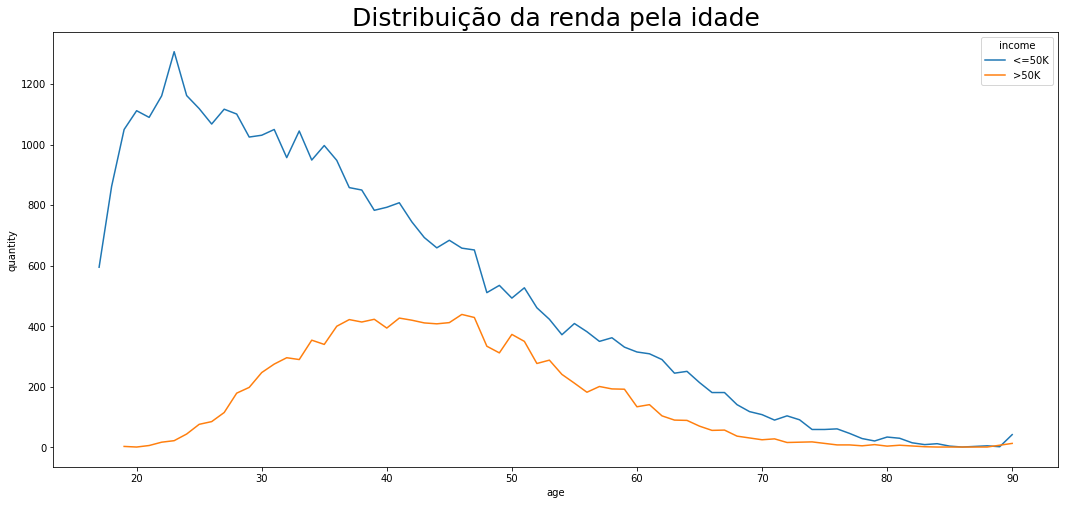

In [11]:
plt.figure(figsize=(18, 8))
plt.title('Distribuição da renda pela idade', fontdict={'fontsize':25})
sns.lineplot(x='age', y='education', hue='income', data=df.groupby(['age', 'income'],as_index=False).count())
plt.ylabel('quantity')

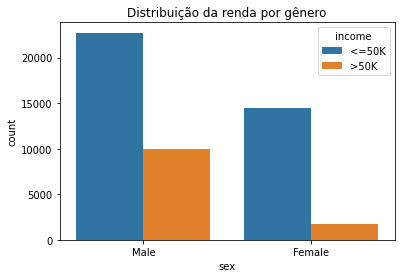

In [12]:
plt.title('Distribuição da renda por gênero')
sns.countplot(x='sex', hue='income', data=df)

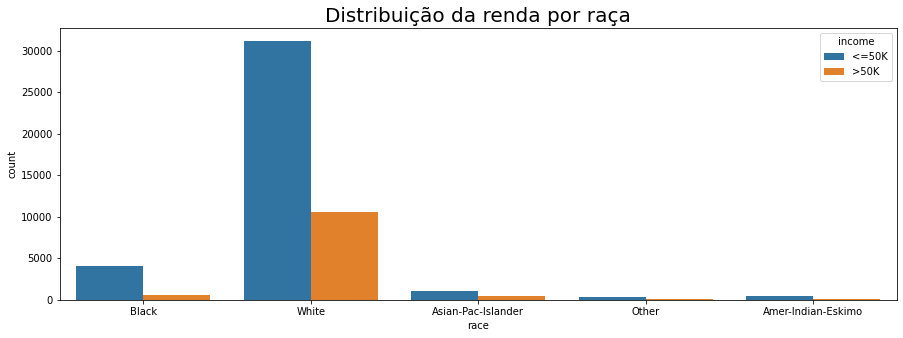

In [13]:
plt.figure(figsize=(15, 5))
plt.title('Distribuição da renda por raça', fontdict={'fontsize':20})
sns.countplot(x='race', hue='income', data=df)

## Pré-processamento dos dados

In [14]:
for e in df.columns:
    df[e].fillna('Undefined', inplace=True)

In [15]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
# Aplicando Label Encoder
enc = LabelEncoder()
obj = df[df.select_dtypes('object').columns]
obj.drop('income', axis=1, inplace=True)
obj = obj.apply(enc.fit_transform)
# Adicionando sufixo nos nomes das colunas
obj = obj.add_suffix('_enc')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
obj.head()

,workclass_enc,education_enc,marital-status_enc,occupation_enc,relationship_enc,race_enc,sex_enc,native-country_enc
0,3,1,4,6,3,2,1,39
1,3,11,2,4,0,4,1,39
2,1,7,2,10,0,4,1,39
3,3,15,2,6,0,2,1,39
4,7,15,4,14,3,4,0,39


In [18]:
# Unindo os dataframes "df" e "obj" e excluindo as colunas categoricas de "df"
df_int = pd.concat([obj, df], axis=1)
df_int.drop(df_int.select_dtypes('object').columns, axis=1, inplace=True)

In [19]:
# Criando uma coluna com o capital total e excluindo o de ganho e perda
df_int['capital_total'] = df_int['capital-gain'] - df_int['capital-loss']
# A coluna education_enc será excluída também, pois é referente a escolaridade, assim como a coluna edcational-num
df_int.drop(['capital-gain', 'capital-loss', 'education_enc'], axis=1, inplace=True)
# Colocando novamente a coluna income da dataframe "df", ecluído no drop acima
df_int['income'] = df['income']

In [20]:
df_int.head()

,workclass_enc,marital-status_enc,occupation_enc,relationship_enc,race_enc,sex_enc,native-country_enc,age,educational-num,hours-per-week,capital_total,income
0,3,4,6,3,2,1,39,25,7,40,0,<=50K
1,3,2,4,0,4,1,39,38,9,50,0,<=50K
2,1,2,10,0,4,1,39,28,12,40,0,>50K
3,3,2,6,0,2,1,39,44,10,40,7688,>50K
4,7,4,14,3,4,0,39,18,10,30,0,<=50K


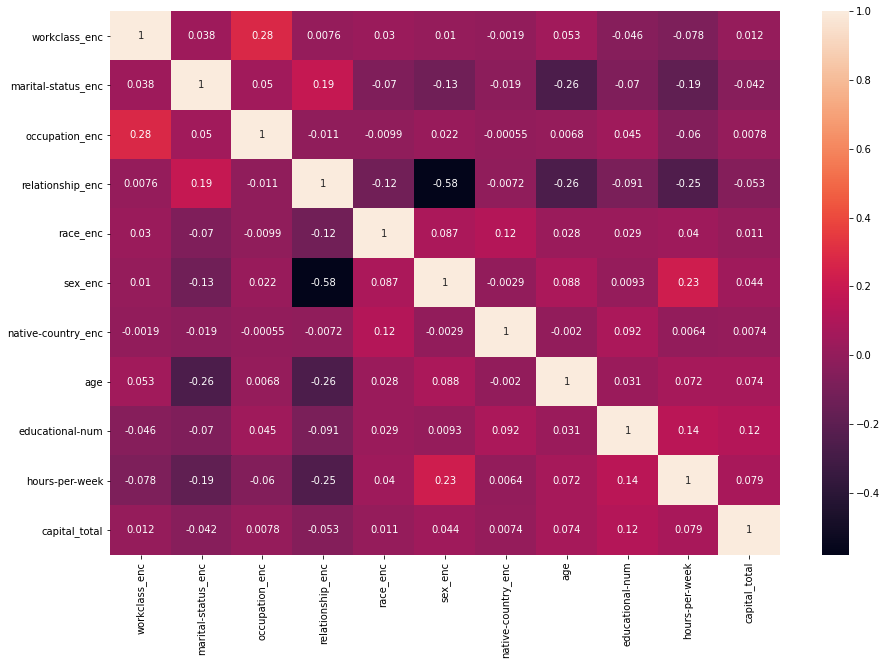

In [21]:
# Verificando a correlação
corr = df_int.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

## Construindo o modelo de Machine Learning

In [22]:
knn = KNeighborsClassifier()
svm = SVC()

In [23]:
# Dividindo os dados de entrada (x) e o de saída (y)
x = df_int.drop('income', axis=1)
y = df_int['income']

In [24]:
# Criando os Pipelines
pip_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', knn)
])

pip_2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', knn)
])

pip_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm)
])

pip_4 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', svm)
])

In [25]:
# Criando os parâmetros para o KNN
lista_n = list(range(5, 31, 5))
param_knn = {'clf__n_neighbors': lista_n}
# Criando os parâmetros para o SVM
lista_C = [1, 10, 100]
param_svm = {'clf__C': lista_C}

In [26]:
# GridSearchCV do modelo KNN com StandardScaler
gs_knn_std = GridSearchCV(pip_1, param_knn, cv=3, scoring='accuracy', verbose=1)
gs_knn_std.fit(x, y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
           

In [27]:
# Verificando melhor parâmetro
print(f'Melhor resultado: {gs_knn_std.best_score_}')
print(f'Melhor parâmetro: {gs_knn_std.best_params_}')

Melhor resultado: 0.8393800831335381
Melhor parâmetro: {'clf__n_neighbors': 20}


In [28]:
# GridSearchCV do modelo KNN com MinMaxScaler
gs_knn_mms = GridSearchCV(pip_2, param_knn, cv=3, scoring='accuracy', verbose=1)
gs_knn_mms.fit(x, y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf__n_ne

In [29]:
# Verificando melhor parâmetro
print(f'Melhor resultado: {gs_knn_mms.best_score_}')
print(f'Melhor parâmetro: {gs_knn_mms.best_params_}')

Melhor resultado: 0.8356742452789993
Melhor parâmetro: {'clf__n_neighbors': 20}


In [30]:
# GridSearchCV do modelo SVM com StandardScaler
gs_svm_std = GridSearchCV(pip_3, param_svm, cv=3, scoring='accuracy', verbose=1)
gs_svm_std.fit(x, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001

In [31]:
# Verificando melhor parâmetro
print(f'Melhor resultado: {gs_svm_std.best_score_}')
print(f'Melhor parâmetro: {gs_svm_std.best_params_}')

Melhor resultado: 0.8477949593897632
Melhor parâmetro: {'clf__C': 10}


In [32]:
# GridSearchCV do modelo SVM com MinMaxScaler
gs_svm_mms = GridSearchCV(pip_4, param_svm, cv=3, scoring='accuracy', verbose=1)
gs_svm_mms.fit(x, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),


In [33]:
# Verificando melhor parâmetro
print(f'Melhor resultado: {gs_svm_mms.best_score_}')
print(f'Melhor parâmetro: {gs_svm_mms.best_params_}')

Melhor resultado: 0.8456042516711394
Melhor parâmetro: {'clf__C': 100}


# Analisando o melhor modelo

In [34]:
# Separando os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [35]:
# Aplicando matriz de confusão
print(pd.crosstab(y_test, gs_svm_std.predict(x_test), margins=True))

col_0   <=50K  >50K    All
income                    
<=50K    8919   435   9354
>50K     1186  1671   2857
All     10105  2106  12211


In [36]:
# Verificando as métricas de avaliação
print(metrics.classification_report(y_test, gs_svm_std.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      9354
        >50K       0.79      0.58      0.67      2857

    accuracy                           0.87     12211
   macro avg       0.84      0.77      0.80     12211
weighted avg       0.86      0.87      0.86     12211



In [37]:
# Criando coluna de predição
df_int['income_predict'] = gs_svm_std.predict(x)

In [38]:
df_int.head()

,workclass_enc,marital-status_enc,occupation_enc,relationship_enc,race_enc,sex_enc,native-country_enc,age,educational-num,hours-per-week,capital_total,income,income_predict
0,3,4,6,3,2,1,39,25,7,40,0,<=50K,<=50K
1,3,2,4,0,4,1,39,38,9,50,0,<=50K,<=50K
2,1,2,10,0,4,1,39,28,12,40,0,>50K,<=50K
3,3,2,6,0,2,1,39,44,10,40,7688,>50K,>50K
4,7,4,14,3,4,0,39,18,10,30,0,<=50K,<=50K


In [39]:
acertos = len(df_int[df_int['income'] == df_int['income_predict']].index)
erros = len(df_int[df_int['income'] != df_int['income_predict']].index)

In [40]:
print(f'Houve {acertos} acertos do modelo')
print(f'Houve {erros} erros do modelo')

Houve 41904 acertos do modelo
Houve 6938 erros do modelo
